<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<ipython-input-6-e6c72746722d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['ConvertedComp'], hist=False)


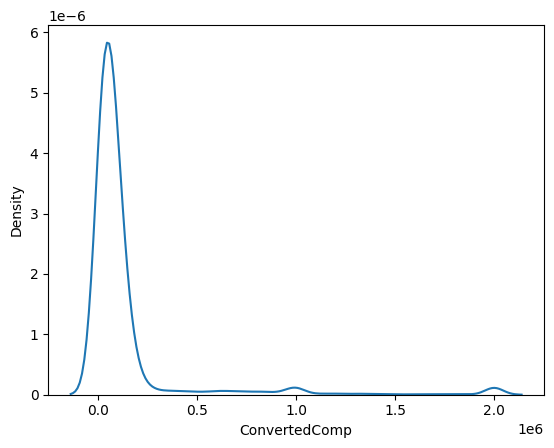

In [6]:
# your code goes here
import seaborn as sns
ax = sns.distplot(df['ConvertedComp'], hist=False)

Plot the histogram for the column `ConvertedComp`.


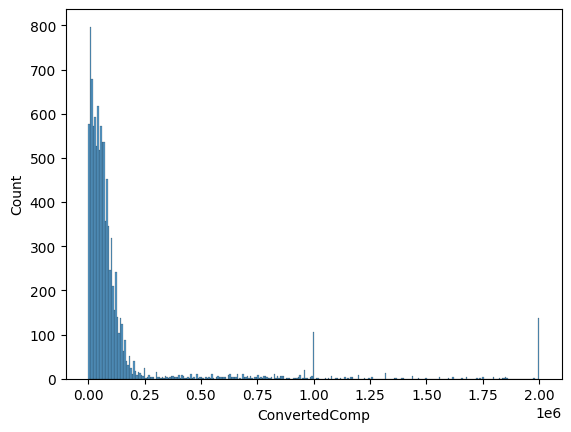

In [8]:
# your code goes here
ax = sns.histplot(df['ConvertedComp'])


What is the median of the column `ConvertedComp`?


In [9]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [12]:
# your code goes here
df['Gender'].value_counts()

,count
Gender,
Man,10480
Woman,731
"Non-binary, genderqueer, or gender non-conforming",63
"Man;Non-binary, genderqueer, or gender non-conforming",26
"Woman;Non-binary, genderqueer, or gender non-conforming",14
Woman;Man,9
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",2


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [14]:
# your code goes here
df[df['Gender'] == 'Woman']['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [15]:
# your code goes here
df['Age'].describe()

,Age
count,11111.000000
mean,30.778895
std,7.393686
min,16.000000
25%,25.000000
50%,29.000000
75%,35.000000
max,99.000000


Plot a histogram of the column `Age`.


<Axes: xlabel='Age', ylabel='Count'>

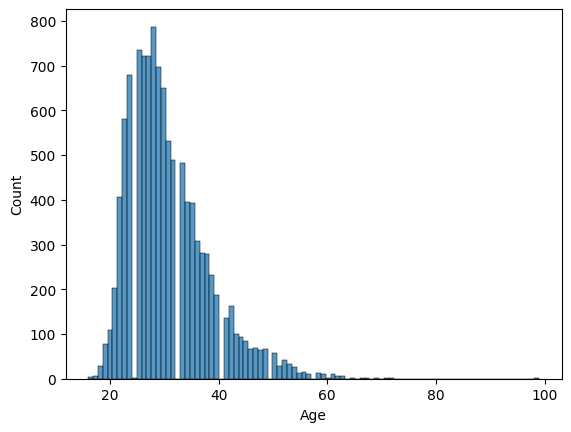

In [16]:
# your code goes here
sns.histplot(df['Age'])

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


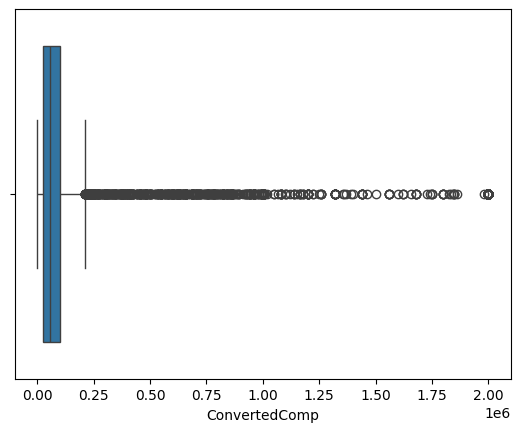

In [17]:
# your code goes here
ax = sns.boxplot(x=df['ConvertedComp'])

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [19]:
# your code goes here
IQR = df['ConvertedComp'].quantile(0.75) - df['ConvertedComp'].quantile(0.25)
IQR

73132.0

Find out the upper and lower bounds.


In [24]:
# your code goes here
Lbound = df['ConvertedComp'].quantile(0.25) - 1.5*IQR
Lbound = max(Lbound, df['ConvertedComp'].min())
Lbound

0.0

In [25]:
Ubound = df['ConvertedComp'].quantile(0.75) + 1.5*IQR
Ubound

209698.0

Identify how many outliers are there in the `ConvertedComp` column.


In [26]:
# your code goes here
len(df[df['ConvertedComp'] > Ubound])

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [27]:
# your code goes here
df2 = df[df['ConvertedComp'] <= Ubound]
df2['ConvertedComp'].median()

52704.0

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [36]:
# your code goes here

df = df.copy()

df = df.apply(pd.to_numeric, errors='coerce')

df = df.dropna(subset=['Age'])

age_correlations = df.corr()['Age'].drop('Age')

print(age_correlations)



Respondent     NaN
MainBranch     NaN
Hobbyist       NaN
OpenSourcer    NaN
OpenSource     NaN
                ..
Sexuality      NaN
Ethnicity      NaN
Dependents     NaN
SurveyLength   NaN
SurveyEase     NaN
Name: Age, Length: 84, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
